# Desarrollo de un modelo de clasificación


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt
from tqdm import tqdm 



Se carga la data para entrenamiento y prueba.

In [ ]:
# Cargar los datos
X_train = pd.read_csv('files/output/train.csv')
X_test = pd.read_csv('files/output/test.csv')
y_all = pd.read_csv('files/output/target.csv') 

# y tiene la variable target en la segunda columna, por eso se pone el 1
y_train = y_all.iloc[:300000, 1]  
y_test = y_all.iloc[300000:307511, 1] 

# Dividir las características en X_train y X_test (coincidiendo con y_train y y_test)
X_train = X_train.iloc[:300000, :]
X_test = X_test.iloc[10000:17511, :]

# Verificar tamaños
print("Tamaño X_train:", X_train.shape)
print("Tamaño y_train:", y_train.shape)
print("Tamaño X_test:", X_test.shape)
print("Tamaño y_test:", y_test.shape)


Tamaño X_train: (300000, 88)
Tamaño y_train: (300000,)
Tamaño X_test: (7511, 88)
Tamaño y_test: (7511,)


Voy a optar por entrenar un random forest para intentar predecir la posibilidad de que la persona entre en mora 1 o no entre en mora 0.

Realice varios entrenamientos variando varios hiper parametros empezando desde (n_estimators=100, max_depth=10)  hasta (n_estimators=400, max_depth=50) evaluando el modelo en cada resultado viendo como variaban sus metricas.

random_state=42 no hay necesidad de cambiarlo.

In [4]:
# Entrenar modelo Random Forest, n_estimators=100 es el numero de arboles que tiene el modelo, si bien más árboles 
# pueden mejorar la precisión del modelo,  aumentan el tiempo de entrenamiento. (100 es un parametro basico como punto de partida) 
# max_depth=10 Una profundidad de 30 significa que cada árbol puede tomar como máximo 10 decisiones en su camino desde la raíz hasta una hoja.
# Limitar la profundidad del arbol es fundamental para evitar el overfitting


X_sample = X_train
y_sample = y_train


# Crear y entrenar el modelo
rf = RandomForestClassifier(n_estimators=400, max_depth=50, random_state=42)

print("Entrenando Random Forest (400 árboles)...")
rf.fit(X_sample, y_sample)
print("✅ Entrenamiento completado.")



Entrenando Random Forest (400 árboles)...
✅ Entrenamiento completado.


Se evalúa el modelo utilizando métricas específicas para problemas de clasificación.
Una de ellas es el AUC (Área Bajo la Curva ROC), que representa la capacidad del modelo para distinguir correctamente entre clases. Un valor alto de AUC indica que el modelo tiene buena capacidad para identificar correctamente los valores reales y evitar falsos positivos.

También se utiliza la matriz de confusión, que muestra cómo se comporta el modelo al clasificar cada clase. Por ejemplo, de todos los casos en los que el valor real era 0, cuántos fueron correctamente clasificados como 0, y de todos los casos en los que el valor real era 1, cuántos fueron correctamente clasificados como 1.

Por ultimo se muestran las variables que tienen mas peso para el modelo a la hora de determinar si una persona entraria en mora o no

📊 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      6922
           1       0.00      0.00      0.00       589

    accuracy                           0.92      7511
   macro avg       0.46      0.50      0.48      7511
weighted avg       0.85      0.92      0.88      7511

🔍 ROC AUC: 0.5086510910563451
🧩 Matriz de Confusión:
[[6922    0]
 [ 589    0]]


d:\GIT\Analysis-home-credit-default-risk\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\GIT\Analysis-home-credit-default-risk\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\GIT\Analysis-home-credit-default-risk\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

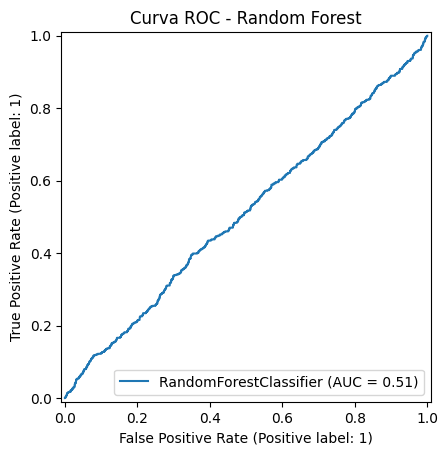

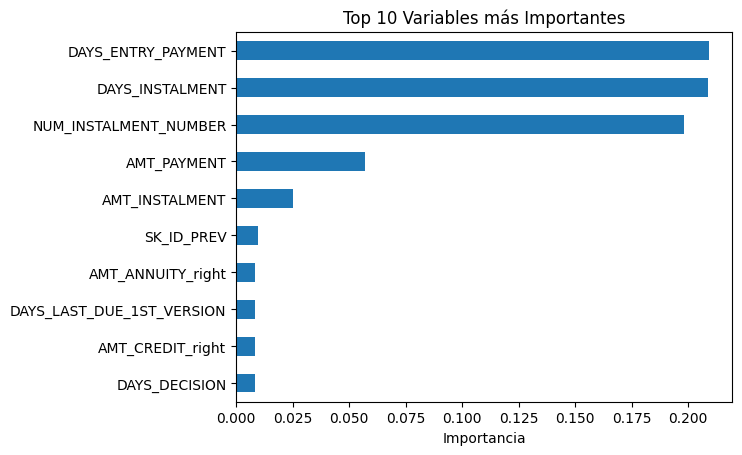

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import pandas as pd

X_test_sample = X_test
y_test_sample = y_test

y_pred = rf.predict(X_test_sample)  # Predicciones binarias
y_prob = rf.predict_proba(X_test_sample)[:, 1]  # Probabilidades de la clase positiva (1)

# Metricas de evaluación
print("📊 Reporte de Clasificación:")
print(classification_report(y_test_sample, y_pred))  # Reporte de clasificación
print("🔍 ROC AUC:", roc_auc_score(y_test_sample, y_prob))  # AUC para clasificación binaria
print("🧩 Matriz de Confusión:")
print(confusion_matrix(y_test_sample, y_pred))  # Matriz de confusión


RocCurveDisplay.from_estimator(rf, X_test_sample, y_test_sample)  # Mostrar curva ROC
plt.title("Curva ROC - Random Forest")
plt.show()

importances = pd.Series(rf.feature_importances_, index=X_train.columns)  
importances.sort_values(ascending=False).head(10).plot(kind='barh')  # Top 10 variables más importantes
plt.gca().invert_yaxis()  
plt.title("Top 10 Variables más Importantes")
plt.xlabel("Importancia")
plt.show()
